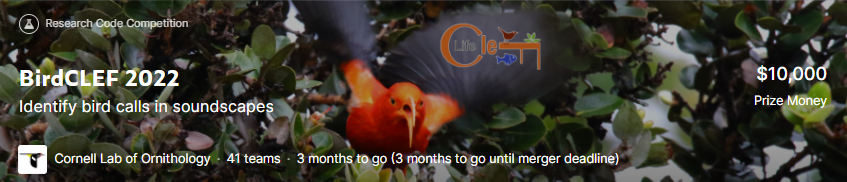

音声認識のコンペです。どうも毎年やっているようです。

This is a speech recognition competition. It seems to be held every year.

BirdCLEF 2021を参考に進めるのが近道のような気がします。

I feel that the shortcut is to proceed with BirdCLEF 2021 as a reference.

https://www.kaggle.com/c/birdclef-2021

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
#!pip install  pygame

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
import seaborn as sns
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import json
#import pygame
import librosa
import librosa.display
import IPython.display as ipd
import plotly.express as ex

In [ ]:
train = pd.read_csv("../input/birdclef-2022/train_metadata.csv")
train

### primary_labelは152種類ある。該当するディレクトリも同じ数。

### There are 152 primary_label types. The same number of directories.

In [ ]:
len(train.primary_label.unique())

In [ ]:
train.primary_label.unique()

In [ ]:
train.secondary_labels.unique()

In [ ]:
train.info()

### typeの中身を見てみる。

### Let's take a look at the contents of type.

In [ ]:
disptype = []
for i in range(len(train)):
    a = train.type[i].replace('[','')  
    a = a.replace(']','')
    a = a.replace("'","")
    for x in range(len(a.split(','))):
        disptype.append(a.split(',')[x])
    #break
disptype = list(set(disptype))
disptype[1:20]

### 位置情報がはいっているけど、関係あるんですかね。鳥の鳴き声に。。方言なんか聞いたことない。

### It's got location data, but I wonder if that has anything to do with it. Bird sounds. I've never heard a dialect.

In [ ]:
fig = ex.scatter_geo(
    train,
    lat="latitude",    lon="longitude",    color="common_name",
    width=800,    height=500,
    title="BirdCLEF 2022"
)
fig.show()

In [ ]:
eBird = pd.read_csv("../input/birdclef-2022/eBird_Taxonomy_v2021.csv")
eBird

In [ ]:
with open("../input/birdclef-2022/scored_birds.json") as ds:
    birds = json.load(ds)

### 21種類の鳥がいるようです。

### There seem to be 21 species of birds.

In [ ]:
birds

### Audioファイルを１つ聞いてみよう。

### Let's listen to one of the Audio files.

In [ ]:
ipd.Audio(f"../input/birdclef-2022/train_audio/afrsil1/XC125458.ogg")

In [ ]:
test= pd.read_csv('../input/birdclef-2022/test.csv')
test

In [ ]:
ipd.Audio(f"../input/birdclef-2022/test_soundscapes/soundscape_453028782.ogg")

### 提出物。-問題の鳥が5秒のウィンドウの間に呼び出されたかどうかのTrue / False。

### Submissions. -True / False if the bird in question was called during a 5 second window.

In [ ]:
 pd.read_csv('../input/birdclef-2022/sample_submission.csv')

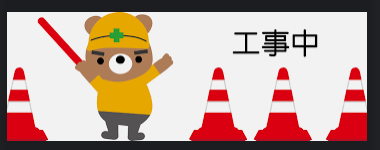